 # installing lbraries  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load dataset( only two columne)

In [36]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns=['label','message']
print("Dataset Shape:", df.shape)          
print("Labels:", df["label"].unique())      
df.info() 
df.head()

Dataset Shape: (5572, 2)
Labels: ['ham' 'spam']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#data process 
df['label']=df['label'].map({'ham':0,'spam':1})


# train-test split 

In [6]:
X=df['message']
Y=df['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# converting tetx to number 

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# model trainnig 

In [11]:
model=MultinomialNB()
model.fit(X_train_vec,Y_train)

MultinomialNB()

# model scoring 

In [15]:
y_pred=model.predict(X_test_vec)
print("accuracy",accuracy_score(Y_test,y_pred))

accuracy 0.9668161434977578


In [16]:
print("classification report",classification_report(Y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# confusion matrix

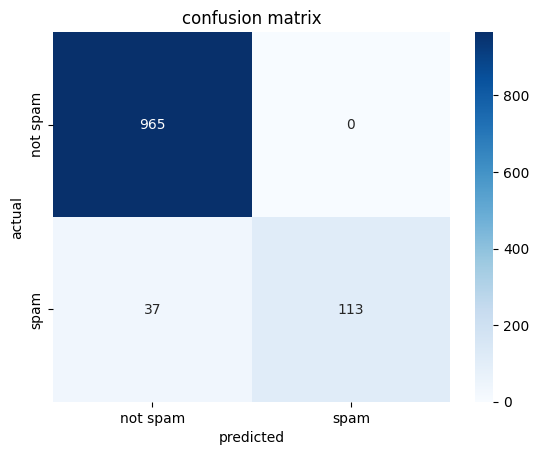

In [21]:
conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['not spam','spam'],yticklabels=['not spam','spam'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()
            

# test 

In [34]:
def predict_message(msg):
    vecc_mesg=vectorizer.transform([msg])
    pred=model.predict(vecc_mesg)[0]
    return "spam" if pred else"not spam"
print(predict_message("Congratulations! You have won a lottery."))
print(predict_message("you are selected! dear candidate"))
print(predict_message("Hey, are we still meeting at 6?"))

spam
not spam
not spam
